In [1]:
import pandas as pd
import numpy
pd.set_option('display.max_columns', None)


In [2]:
df= pd.read_excel('../data/E Commerce Dataset.xlsx', sheet_name='E Comm')

In [3]:
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5478,55479,0,3.0,Computer,1,27.0,Credit Card,Male,3.0,4,Mobile Phone,1,Married,3,0,14.0,2.0,4.0,11.0,163.12
3272,53273,0,14.0,Computer,1,9.0,Credit Card,Female,3.0,2,Laptop & Accessory,4,Divorced,3,0,25.0,1.0,4.0,8.0,167.44
4430,54431,0,29.0,Mobile Phone,1,7.0,Credit Card,Male,3.0,4,Others,5,Single,2,1,NaN,4.0,5.0,14.0,315.45
858,50859,0,7.0,Mobile Phone,1,8.0,COD,Female,3.0,3,Laptop & Accessory,2,Single,2,0,11.0,1.0,4.0,11.0,166.87
3798,53799,0,9.0,Phone,1,7.0,Credit Card,Male,4.0,5,Mobile Phone,5,Single,3,0,20.0,1.0,2.0,3.0,149.50


In [4]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [5]:
df.info

<bound method DataFrame.info of       CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0              

In [6]:
df.fillna(0, inplace=True)

In [7]:
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4080,54081,1,1.0,Phone,1,24.0,COD,Male,3.0,5,Mobile Phone,1,Married,7,0,13.0,1.0,2.0,4.0,148.67
2487,52488,0,18.0,Mobile Phone,1,11.0,Credit Card,Female,2.0,5,Laptop & Accessory,5,Single,2,1,14.0,0.0,1.0,4.0,157.69
200,50201,0,4.0,Computer,1,13.0,Debit Card,Female,2.0,4,Fashion,3,Divorced,2,0,24.0,3.0,8.0,9.0,189.43
3259,53260,0,10.0,Computer,3,15.0,Debit Card,Male,4.0,5,Fashion,5,Single,3,0,16.0,1.0,2.0,10.0,200.87
2076,52077,1,0.0,Phone,1,0.0,CC,Female,3.0,4,Mobile,5,Single,2,1,15.0,1.0,1.0,0.0,126.00


In [8]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [9]:
df.columns

Index(['customerid', 'churn', 'tenure', 'preferredlogindevice', 'citytier',
       'warehousetohome', 'preferredpaymentmode', 'gender', 'hourspendonapp',
       'numberofdeviceregistered', 'preferedordercat', 'satisfactionscore',
       'maritalstatus', 'numberofaddress', 'complain',
       'orderamounthikefromlastyear', 'couponused', 'ordercount',
       'daysincelastorder', 'cashbackamount'],
      dtype='object')

In [10]:
df = df.apply(lambda x: x.str.lower().replace(' ','_') if x.dtype == "object" else x)

In [11]:
df["gender"].value_counts()

gender
male      3384
female    2246
Name: count, dtype: int64

In [12]:
total_churn = df['churn'].sum()
male_churn = df[df["gender"]=="male"].churn.sum()
male_churn_rate = round(male_churn / total_churn, 4)*100
print(f"male churn rate: {male_churn_rate}%")

male churn rate: 63.29%


In [13]:
female_churn_rate = 100 - male_churn_rate
print(f"female churn rate: {female_churn_rate}%")

female churn rate: 36.71%


In [14]:
from sklearn.metrics import mutual_info_score
information_scores = {}
for col in df.columns:
    if col != 'churn':
        if col != 'customerid':
            mi = mutual_info_score(df['churn'], df[col])
            print(f"Mutual Information between churn and {col}: {mi}")
            information_scores[col] = mi

Mutual Information between churn and tenure: 0.11813655716016397
Mutual Information between churn and preferredlogindevice: 0.0065539351267409895
Mutual Information between churn and citytier: 0.003542690987042914
Mutual Information between churn and warehousetohome: 0.010786690207173513
Mutual Information between churn and preferredpaymentmode: 0.006442394134127245
Mutual Information between churn and gender: 0.00043153945615262423
Mutual Information between churn and hourspendonapp: 0.0018472876273220697
Mutual Information between churn and numberofdeviceregistered: 0.006769985473824319
Mutual Information between churn and preferedordercat: 0.026013548961425232
Mutual Information between churn and satisfactionscore: 0.006155606391214881
Mutual Information between churn and maritalstatus: 0.01597096092702091
Mutual Information between churn and numberofaddress: 0.00587870984424293
Mutual Information between churn and complain: 0.0287030909255529
Mutual Information between churn and or

c:\Users\marouane\Desktop\mlops_churn_prediction\env\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [15]:
print("feature with maximum mutual information score:", max(information_scores, key=information_scores.get))

feature with maximum mutual information score: cashbackamount


In [16]:
df["cashbackamount"].describe()

count    5630.000000
mean      177.223030
std        49.207036
min         0.000000
25%       145.770000
50%       163.280000
75%       196.392500
max       324.990000
Name: cashbackamount, dtype: float64

<Axes: ylabel='Frequency'>

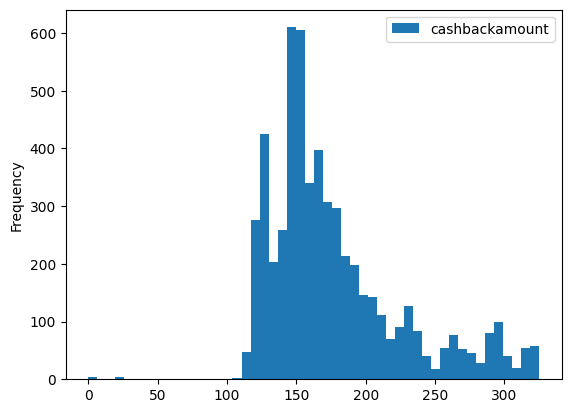

In [17]:
df.plot(kind='hist', y='cashbackamount', bins=50)

<Axes: ylabel='Frequency'>

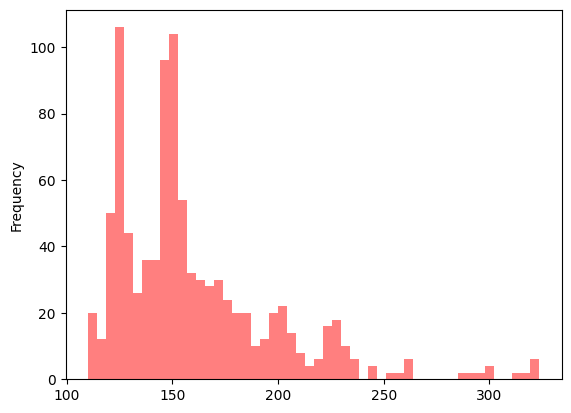

In [18]:
df[df["churn"]==1]["cashbackamount"].plot(kind='hist', bins=50, color='red', alpha=0.5)

customers with >200 in average cashbank are less likely to churning

In [19]:
df['customerid'].dtype

dtype('int64')

In [20]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numerical = [col for col in df.columns if df[col].dtype != 'object']

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.feature_extraction import DictVectorizer
train_d = X_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train_dict = dv.fit_transform(train_d)

In [23]:
df_test_dict = X_test.to_dict(orient='records')
X_test_dict = dv.transform(df_test_dict)

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000, solver='lbfgs', C=1.0)
model.fit(X_train_dict, y_train)
y_pred = model.predict_proba(X_test_dict)[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc}")

AUC: 0.8981359680615791


c:\Users\marouane\Desktop\mlops_churn_prediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
regs = [0.01, 0.1, 1.0, 10.0, 100.0]
for c in regs:
    model = LogisticRegression(max_iter=10000, solver='lbfgs', C=c)
    model.fit(X_train_dict, y_train)
    y_pred = model.predict_proba(X_test_dict)[:, 1]
    auc = roc_auc_score(y_test, y_pred)
    print(f"C: {c} => AUC: {auc}")

C: 0.01 => AUC: 0.8865956285722494
C: 0.1 => AUC: 0.8966711663842376


c:\Users\marouane\Desktop\mlops_churn_prediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C: 1.0 => AUC: 0.8981359680615791


c:\Users\marouane\Desktop\mlops_churn_prediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C: 10.0 => AUC: 0.8992159002785995
C: 100.0 => AUC: 0.8992101559582963


c:\Users\marouane\Desktop\mlops_churn_prediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for train_idx, val_idx in kfold.split(X_train_dict):
    X_train_kf, X_val_kf = X_train_dict[train_idx], X_train_dict[val_idx]
    y_train_kf, y_val_kf = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    model = LogisticRegression(max_iter=10000, solver='lbfgs', C=1.0)
    model.fit(X_train_kf, y_train_kf)
    y_pred = model.predict_proba(X_val_kf)[:, 1]
    auc = roc_auc_score(y_val_kf, y_pred)
    scores.append(auc)
    print(f"AUC: {auc}")

print(f"Mean AUC: {numpy.mean(scores)}")
print(f"Std AUC: {numpy.std(scores)}")

c:\Users\marouane\Desktop\mlops_churn_prediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.8961125616478097


c:\Users\marouane\Desktop\mlops_churn_prediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.8992170843381917


c:\Users\marouane\Desktop\mlops_churn_prediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.8849255147213829


c:\Users\marouane\Desktop\mlops_churn_prediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.8728007101642256
AUC: 0.888901257046537
Mean AUC: 0.8883914255836294
Std AUC: 0.00929681346598137


c:\Users\marouane\Desktop\mlops_churn_prediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Classification Models Comparison

In [27]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

# Dictionary to store model results
model_results = {}

# 1. Logistic Regression (already trained, adding for comparison)
print("=" * 60)
print("1. LOGISTIC REGRESSION")
print("=" * 60)
lr_model = LogisticRegression(max_iter=10000, solver='lbfgs', C=1.0)
lr_model.fit(X_train_dict, y_train)
lr_pred = lr_model.predict(X_test_dict)
lr_pred_proba = lr_model.predict_proba(X_test_dict)[:, 1]

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred_proba)

print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")
print(f"AUC-ROC: {lr_auc:.4f}")

model_results['Logistic Regression'] = {
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'F1-Score': lr_f1,
    'AUC-ROC': lr_auc
}


1. LOGISTIC REGRESSION
Accuracy: 0.9085
Precision: 0.8534
Recall: 0.5351
F1-Score: 0.6578
AUC-ROC: 0.8981


c:\Users\marouane\Desktop\mlops_churn_prediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# 2. Decision Tree Classifier
print("\n" + "=" * 60)
print("2. DECISION TREE CLASSIFIER")
print("=" * 60)
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train_dict, y_train)
dt_pred = dt_model.predict(X_test_dict)
dt_pred_proba = dt_model.predict_proba(X_test_dict)[:, 1]

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_auc = roc_auc_score(y_test, dt_pred_proba)

print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")
print(f"AUC-ROC: {dt_auc:.4f}")

model_results['Decision Tree'] = {
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'F1-Score': dt_f1,
    'AUC-ROC': dt_auc
}



2. DECISION TREE CLASSIFIER
Accuracy: 0.9414
Precision: 0.8742
Recall: 0.7514
F1-Score: 0.8081
AUC-ROC: 0.8954


In [29]:
from sklearn.metrics import classification_report
# 3. Random Forest Classifier
print("\n" + "=" * 60)
print("3. RANDOM FOREST CLASSIFIER")
print("=" * 60)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_dict, y_train)
rf_pred = rf_model.predict(X_test_dict)
rf_pred_proba = rf_model.predict_proba(X_test_dict)[:, 1]

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred_proba)

print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"AUC-ROC: {rf_auc:.4f}")

model_results['Random Forest'] = {
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1-Score': rf_f1,
    'AUC-ROC': rf_auc
}

print(classification_report(y_test, rf_pred))



3. RANDOM FOREST CLASSIFIER
Accuracy: 0.9591
Precision: 0.9860
Recall: 0.7622
F1-Score: 0.8598
AUC-ROC: 0.9842
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       941
           1       0.99      0.76      0.86       185

    accuracy                           0.96      1126
   macro avg       0.97      0.88      0.92      1126
weighted avg       0.96      0.96      0.96      1126



In [ ]:
print("\n" + "=" * 60)
print("4. GRADIENT BOOSTING CLASSIFIER")
print("=" * 60)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42, learning_rate=0.1)
gb_model.fit(X_train_dict, y_train)
gb_pred = gb_model.predict(X_test_dict)
gb_pred_proba = gb_model.predict_proba(X_test_dict)[:, 1]

gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
gb_auc = roc_auc_score(y_test, gb_pred_proba)

print(f"Accuracy: {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")
print(f"F1-Score: {gb_f1:.4f}")
print(f"AUC-ROC: {gb_auc:.4f}")

model_results['Gradient Boosting'] = {
    'Accuracy': gb_accuracy,
    'Precision': gb_precision,
    'Recall': gb_recall,
    'F1-Score': gb_f1,
    'AUC-ROC': gb_auc
}



4. GRADIENT BOOSTING CLASSIFIER
Accuracy: 0.9227
Precision: 0.8657
Recall: 0.6270
F1-Score: 0.7273
AUC-ROC: 0.9380


In [70]:
# Summary: Model Comparison Table
print("\n" + "=" * 60)
print("MODEL COMPARISON SUMMARY")
print("=" * 60)

results_df = pd.DataFrame(model_results).T
print(results_df)

# Find the best models for each metric
print("\n" + "-" * 60)
print("BEST MODELS BY METRIC")
print("-" * 60)
for metric in results_df.columns:
    best_model = results_df[metric].idxmax()
    best_score = results_df[metric].max()
    print(f"{metric:15s}: {best_model:25s} ({best_score:.4f})")



MODEL COMPARISON SUMMARY
                     Accuracy  Precision    Recall  F1-Score   AUC-ROC
Logistic Regression  0.908526   0.853448  0.535135  0.657807  0.898136
Decision Tree        0.941385   0.874214  0.751351  0.808140  0.895356
Random Forest        0.959147   0.986014  0.762162  0.859756  0.984206
Gradient Boosting    0.922735   0.865672  0.627027  0.727273  0.938030
AdaBoost             0.835702   0.000000  0.000000  0.000000  0.854183
K-Nearest Neighbors  0.819716   0.333333  0.097297  0.150628  0.628472
Naive Bayes          0.753996   0.371508  0.718919  0.489871  0.781446
SVM                  0.835702   0.000000  0.000000  0.000000  0.512623

------------------------------------------------------------
BEST MODELS BY METRIC
------------------------------------------------------------
Accuracy       : Random Forest             (0.9591)
Precision      : Random Forest             (0.9860)
Recall         : Random Forest             (0.7622)
F1-Score       : Random Forest    